In [85]:
import os
import math
import tarfile
import urllib
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline
from sklearn.model_selection import train_test_split
import seaborn as sb
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Loading Data

In [2]:
housing_path = "F:/ML_Project/Housing_California/datasets/housing"

def load_data(housing_path = housing_path):
    csv_path = os.path.join(housing_path, "housing.csv")
    return pd.read_csv(csv_path)

housing = load_data()

In [22]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   longitude                  16512 non-null  float64
 1   latitude                   16512 non-null  float64
 2   housing_median_age         16512 non-null  float64
 3   total_rooms                16512 non-null  float64
 4   total_bedrooms             16354 non-null  float64
 5   population                 16512 non-null  float64
 6   households                 16512 non-null  float64
 7   median_income              16512 non-null  float64
 8   median_house_value         16512 non-null  float64
 9   ocean_proximity            16512 non-null  object 
 10  rooms_per_household        16512 non-null  float64
 11  bedrooms_per_room          16354 non-null  float64
 12  populations_per_household  16512 non-null  float64
dtypes: float64(12), object(1)
memory usage: 1.

In [17]:
housing.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


# Data Visualization

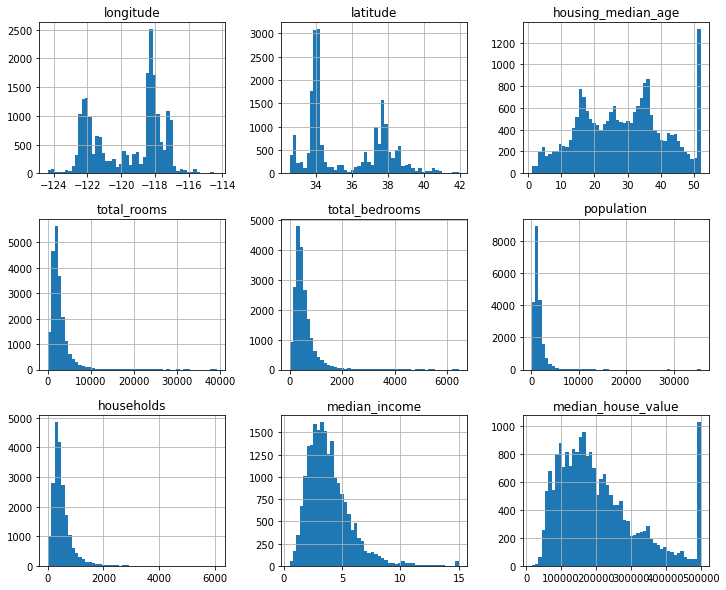

In [10]:
%matplotlib inline
#plt.hist(housing, bins=50, figsize = (12,10))
housing.hist(bins = 50, figsize = (12,10))
plt.show()

# Train Test Split

In [3]:
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)

In [14]:
train_set["median_income"].value_counts()

3.1250     42
15.0001    41
2.6250     39
4.1250     36
2.8750     35
           ..
2.6127      1
4.1165      1
5.7485      1
6.1527      1
2.5755      1
Name: median_income, Length: 10932, dtype: int64

<AxesSubplot:>

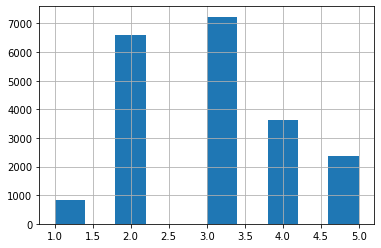

In [7]:
#Stratified Sets
housing["income_category"]=pd.cut(housing["median_income"], bins=[0,1.5,3.0,4.5,6.,np.inf], labels=[1,2,3,4,5])
housing["income_category"].hist()


In [9]:
# Creating Stratified sets
Split = StratifiedShuffleSplit(n_splits=1, test_size= 0.2, random_state=42)
for train_index, test_index in Split.split(housing, housing["income_category"]):
    strat_train_set=housing.loc[train_index]
    strat_test_set=housing.loc[test_index]
    


In [16]:
for set_ in (strat_train_set, strat_test_set):
    set_.drop("income_category", axis=1, inplace=True)

KeyError: "['income_category'] not found in axis"

In [18]:
strat_train_set.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   median_house_value  16512 non-null  float64
 9   ocean_proximity     16512 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.4+ MB


# Correlation
### change in one value with relation to another

In [19]:
data = strat_train_set.copy()
corr = data.corr()
corr

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924478,-0.105823,0.048909,0.076686,0.108071,0.063146,-0.019615,-0.047466
latitude,-0.924478,1.000000,0.005737,-0.039245,-0.072550,-0.115290,-0.077765,-0.075146,-0.142673
housing_median_age,-0.105823,0.005737,1.000000,-0.364535,-0.325101,-0.298737,-0.306473,-0.111315,0.114146
total_rooms,0.048909,-0.039245,-0.364535,1.000000,0.929391,0.855103,0.918396,0.200133,0.135140
total_bedrooms,0.076686,-0.072550,-0.325101,0.929391,1.000000,0.876324,0.980167,-0.009643,0.047781
population,0.108071,-0.115290,-0.298737,0.855103,0.876324,1.000000,0.904639,0.002421,-0.026882
households,0.063146,-0.077765,-0.306473,0.918396,0.980167,0.904639,1.000000,0.010869,0.064590
median_income,-0.019615,-0.075146,-0.111315,0.200133,-0.009643,0.002421,0.010869,1.000000,0.687151
median_house_value,-0.047466,-0.142673,0.114146,0.135140,0.047781,-0.026882,0.064590,0.687151,1.000000


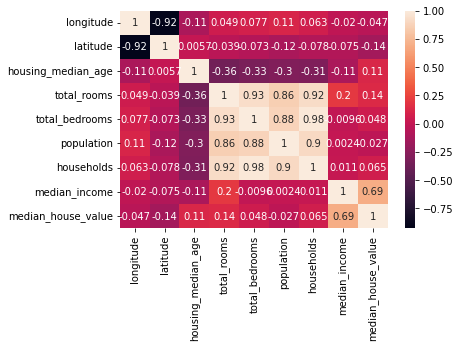

In [20]:
corr_matx = sb.heatmap(corr, cmap='rocket', annot = True)

In [21]:
housing = strat_train_set.copy()
housing["rooms_per_household"]=housing["total_rooms"]/housing["households"]
housing["bedrooms_per_room"]=housing["total_bedrooms"]/housing["total_rooms"]
housing["populations_per_household"]=housing["population"]/housing["households"]

In [37]:
housing = strat_train_set.drop("median_house_value", inplace = False, axis = 1)
housing_labels = strat_train_set["median_house_value"].copy()

In [38]:
housing_cat = housing["ocean_proximity"].copy()
housing_num = housing.drop("ocean_proximity", inplace = False, axis = 1)

# Pipeline

In [46]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error as mse, r2_score as rs

In [30]:
rooms_ix, bedrooms_ix, population_ix, households_ix= 3,4,5,6 #attribute positions in data set

class CombinedAttributesAdder(BaseEstimator, TransformerMixin):
    def __init__(self, add_bedrooms_per_room = True):
        self.add_bedrooms_per_room = add_bedrooms_per_room
        
    def fit(self, X, y=None):
        return self
    
    def transform(self, X, y=None):
        rooms_per_household = X[:, rooms_ix]/ X[:, households_ix]
        population_per_household = X[:, population_ix]/ X[:, households_ix]
        if self.add_bedrooms_per_room:
            bedroom_per_room = X[:, bedrooms_ix]/ X[:, rooms_ix]
            return np.c_[X, rooms_per_household, population_per_household, bedroom_per_room]
        else:
            return np.c_[X, rooms_per_household, population_per_household]
        
attr_adder = CombinedAttributesAdder(add_bedrooms_per_room = False)
housing_extra_attribs = attr_adder.transform(housing.values)

In [33]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = 'median')),
    ('attribs_adder', CombinedAttributesAdder()),
    ('std_scaler', StandardScaler())
])

In [39]:
num_attribs = housing.select_dtypes(include = ['int64', 'float64']).columns
cat_attribs = ['ocean_proximity']

preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_attribs),
    ('cat', OneHotEncoder(), cat_attribs)
])

In [42]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 16512 entries, 12655 to 19773
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           16512 non-null  float64
 1   latitude            16512 non-null  float64
 2   housing_median_age  16512 non-null  float64
 3   total_rooms         16512 non-null  float64
 4   total_bedrooms      16354 non-null  float64
 5   population          16512 non-null  float64
 6   households          16512 non-null  float64
 7   median_income       16512 non-null  float64
 8   ocean_proximity     16512 non-null  object 
dtypes: float64(8), object(1)
memory usage: 1.3+ MB


In [36]:
pipe = Pipeline([('preprocessor', preprocessor),
                ('LR', LinearRegression())])

In [43]:
pipe.fit(housing, housing_labels)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('attribs_adder',
                                                                   CombinedAttributesAdder()),
                                                                  ('std_scaler',
                                                                   StandardScaler())]),
                                                  Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income'],
      dtype='object')),
                                                 ('cat', OneHotEncoder(),
                                                  ['ocean_proximity'])])),
                ('LR', LinearRegression())])

# Predict Model 

In [44]:
y_pred = pipe.predict(housing)

In [48]:
linear_mse = mse(housing_labels, y_pred)
linear_rmse = np.sqrt(linear_mse)
print("mean squared error: ",linear_rmse)
print("cofficient of determination: ",rs(housing_labels,y_pred))

mean squared error:  68627.87390018745
cofficient of determination:  0.6481553634454353


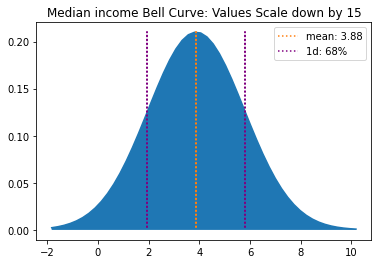

In [189]:
def fnc(x, mean, std):
    c = (x - mean)/sd
    #return (1/sd*math.sqrt(2*math.pi))*math.exp(-0.5*math.pow(c, 2))
    return 1/(std * np.sqrt(2 * np.pi)) * np.exp( - (x - mean)**2 / (2 * std**2))

sd = round(train_set['median_income'].std(), 2)
mean = round(train_set['median_income'].mean(), 2)

X = np.linspace(mean - 3*sd, mean - 3*sd + 12)
mean_X = np.ones(len(X))*mean
d1n = np.ones(len(X))*(mean/2)
d1p = np.ones(len(X))*(mean/2 + mean)
ans = [fnc(x,mean,sd) for x in X]
#spline = make_interp_spline(alist, ans) # making more curvy

plt.plot(X, ans)
plt.plot(mean_X,ans,linestyle =':',label = 'mean: %.2f' %(mean))
plt.plot(d1n,ans,':',color = 'purple', label = '1d: 68%')
plt.plot(d1p,ans,':',color = 'purple')
plt.fill_between(X, ans)
plt.legend()
plt.title("Median income Bell Curve: Values Scale down by 15")
plt.show()

In [194]:
housing_test = strat_test_set.drop('median_house_value', inplace = False, axis = 1)
housing_test_labels = strat_test_set['median_house_value'].copy()

In [204]:
housing_test_labels.tolist().shape()

AttributeError: 'list' object has no attribute 'shape'

In [197]:
t_pred = pipe.predict(housing_test)
linear_test_mse = mse(housing_test_labels, t_pred)
linear_test_rmse = np.sqrt(linear_test_mse)
print("mean squared error: ",linear_test_rmse)
print("cofficient of determination: ",rs(housing_test_labels,t_pred))

mean squared error:  66913.4419132093
cofficient of determination:  0.656459976479592


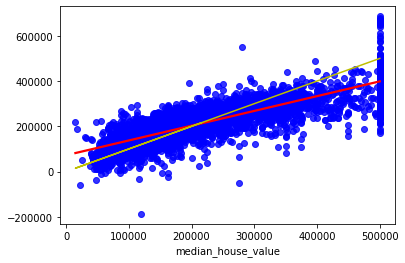

In [208]:
sb.regplot(x=housing_test_labels,y= t_pred, ci=None, color="Red", scatter_kws={"color":"Blue"})
plt.plot(housing_test_labels,housing_test_labels, 'y')